<a href="https://colab.research.google.com/github/pranjal-tiwarigithub/coding-_ninga/blob/main/stacks_LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
4//2

2

# Remove middle of stack

In [ ]:
def remove_middle(arr,count,size):
  print(str(count) + str(arr))
  if count == size//2:  ### N=5 remove 2th , N=4 remove 2th
    arr.pop(0)
    return

  last_element = arr.pop(0)
  remove_middle(arr,count + 1 , size)
  ## on retrun
  arr.insert(0,last_element)

In [ ]:
myarr = [1,2,3,4]
remove_middle(myarr,0,len(myarr))
print(myarr)

0[1, 2, 3, 4]
1[2, 3, 4]
2[3, 4]
[1, 2, 4]


### insert at bottom

In [ ]:
Less than before an element

striver

SyntaxError: ignored

In [ ]:
from os import *
from sys import *
from collections import *
from math import *

def findSpans(price):

    stack = []
    n = len(price)
    answer = [1] * n

    for i in range(0 , n):

        count = 1

        for j in range(len(stack) -1, -1 ,-1):

            if price[i] < stack[j]:
                break

            count =  count + 1

        ## now insert such that smallest number is at top of stack
        answer[i] = count
        sort_stack(price[i] , stack , len(stack))
        print("stack:" + str(stack))

    return answer


def sort_stack(val , stack , length):

    if length == 0 or val <= stack[-1]:
        stack.append(val)
        return

    last_element =  stack.pop()
    sort_stack(val , stack , len(stack))
    stack.append(last_element)








Minimum Cost To Make String Valid


In [ ]:
from os import *
from sys import *
from collections import *
from math import *

def findMinimumCost(STR):
	# Write your code here.

	## if odd then balancing not possible

	if len(STR) % 2 == 1:
		return -1

	### remove all balanced brackets

	stack = []
	for i in range(0,len(STR)):
		if STR[i] == '{':
			stack.append("{")
		elif STR[i] == "}" and len(stack) !=0 and stack[-1] == "{" :
			stack.pop()
		else:
			stack.append("}")

	## STACK now has only imbalanced brackets

	a = 0  ## len of {
	b = 0  ## len of }

	for i in range(0,len(stack)):
		if stack[i] == "{":
			a = a + 1
		else:
			b = b + 1

	return ((a+1) // 2 + (b+1) // 2)



Largest rectangle in a histogram


In [ ]:

### to get next smaller number index

def next_smaller_number_index(arr , n):

    answer = [n] * n
    stack = []

    ## stack stores index of smallest number on right
    ## i is index


    # start from rightmost end
    for i in range(n -  1  , -1 , -1):

        ## remove elements from stacks if they bigger than arr element
        ## we want index of array element just smaller than our arr element

        while len(stack) != 0 and arr[stack[-1]] >= arr[i]:
            stack.pop()

        if len(stack) != 0:
            answer[i] = stack[-1]

        stack.append(i)

    ## return -1 as index of rightmost shortest element makes no sense as we are measuring breadth
    ## -1 means there is no shorter element on the right
    ## hence replace -1 by n i.e last elements's postion


    return answer

def smallest_element_onLeft_index(arr , n):

    answer = [-1] *  n
    stack = []

    for i in range(0,n,1):

        while len(stack) != 0  and arr[stack[-1]] >= arr[i]:
            ## keep popping bigger numbers
            stack.pop()

        ## stop now at top we have index of number which is just shorter than arr element

        if len(stack) != 0:
            answer[i] = stack[-1]

        stack.append(i)

    return answer



def largestRectangle(arr):
    # Write your code here
    next_smaller = next_smaller_number_index(arr , len(arr))
    prev  = smallest_element_onLeft_index(arr ,len(arr))

    area  = 0

    for i in range(0,len(arr)):
        height = arr[i]
        breadth = next_smaller[i] - prev[i] -1
        new_area = height * breadth

        area =  max(area , new_area)

    return area



circular queue

In [ ]:
from os import *
from sys import *
from collections import *
from math import *

class CircularQueue:

    def __init__ (self, n):
        # Initialize your data structure.

        self.queue = [-1 for i in range(n)]
        self.front = -1
        self.rear =  -1
        self.size = n

    # Enqueues 'X' into the queue. Returns true if it gets pushed into the queue, and false otherwise.
    def enqueue(self, value):
        # Write your code here.


        if (self.rear + 1) % self.size == self.front:
            return False

        elif self.rear == -1 :
             self.front = 0 ## ek enqueue hogaya hai

        self.rear = (self.rear + 1) % self.size
        self.queue[self.rear] = value

        return True


    # Dequeues pop element from queue. Returns -1 if the queue is empty, otherwise returns the popped element.
    def dequeue(self):
        # Write your code here.

        if self.front == -1:
            return -1

        elif self.rear == self.front:
            answer = self.queue[self.rear]
            self.front = self.rear = -1
            return answer

        answer = self.queue[self.front]
        self.front = (self.front + 1) % self.size
        return answer




# sliding window


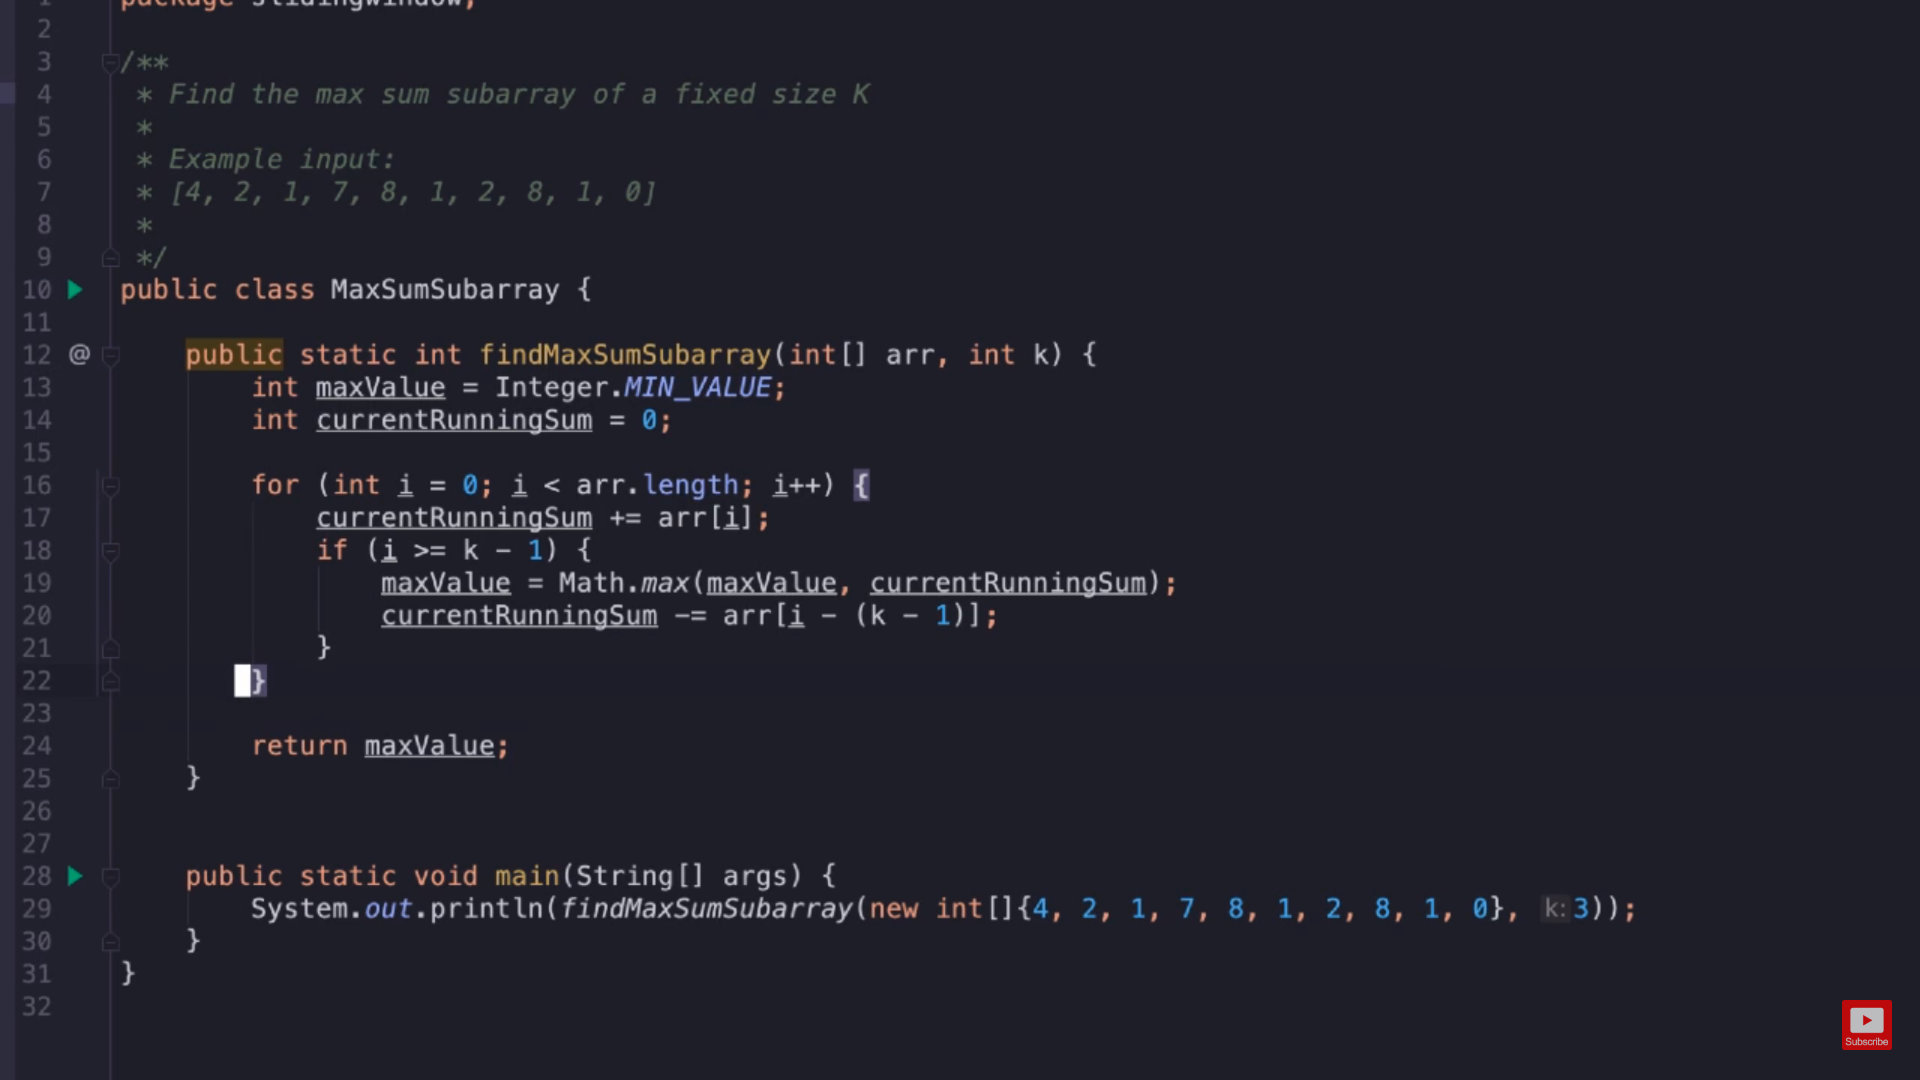

In [ ]:
def maxSum(arr , k):

  max_value = - 10e5
  current_sum = 0;

  for i in range(0,len(arr)):

    current_sum = current_sum + arr[i]
    if i >= k - 1:
      max_value = max(current_sum , max_value)
      current_sum = current_sum - arr[i - (k - 1)]

  return max_value


In [ ]:
myarr = [4,2,1,7,8,1,2,8,1,0]
k = 3
maxSum(myarr , k)

16

Maximum of all subarrays of size K

In [ ]:
from os import *
from sys import *
from collections import *
from math import *

def maxOfSubarray(nums, n, k):
    # write your code here
    # return an integer denoting the answer
    list_of_index = [] ## deque
    ans = []

    for i in range(0,n):

        ### first kick our out of bound index numbers

        if len(list_of_index) != 0 and list_of_index[0] < i - (k - 1):
            list_of_index.pop(0)

        #### renove small elements from right of list (deque)

        while ( (len(list_of_index) != 0) and nums[list_of_index[-1]] <= nums[i]):
            list_of_index.pop()


        list_of_index.append(i)

        if i >= k - 1:
            ans.append(nums[list_of_index[0]])

    return ans

First Negative Integer In Every Window Of Size K

In [ ]:


def firstNegativeInteger(arr, k, n):
    # Write your code here.

    index_of_elements = []
    ans = []

    for i in range(0,n):

        ## remove old elements

        while (len(index_of_elements) > 0 and index_of_elements[0] <= (i - k)):
            index_of_elements.pop(0)

        ## append new element if its negative

        if arr[i] < 0 :
            index_of_elements.append(i)

        ## append to answer if first or higher subarray is done

        if i >= k - 1:
            if len(index_of_elements) != 0:
                ## that means we have some negative number
                ans.append(arr[index_of_elements[0]])
            else:
                ## we don1t have any negative number
                ans.append(0)


    return ans




Reverse First K elements of Queue

In [ ]:


from queue import Queue

def reverseElements(q, k):
    # Write your code here
    # Return a queue

    #### put first k number in stack

    stack = []

    for i in range(0,k):
        stack.append(q.get() )

    ### append those values in queue at rear

    while len(stack) > 0:
        q.put(stack.pop())

    ### now move n-k elements in front og queue to its back
    ## to return those last elements to their original position

    n = q.qsize()

    for i in range(0, n - k):
        q.put(q.get())

    return q